In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import os
from pathlib import Path
from tqdm import trange
from flygym.mujoco import Parameters
from flygym.mujoco.examples.turning_controller import HybridTurningNMF
from flygym.mujoco.arena import OdorArena

# Odor source: array of shape (num_odor_sources, 3) - xyz coords of odor sources
odor_source = np.array(
    [[24, 0, 1.5], [8, -4, 1.5], [16, 4, 1.5], [12, -8, 1.5], [20, 3, 1.5]]
)

# Peak intensities: array of shape (num_odor_sources, odor_dimesions)
peak_intensity = np.array([[1, 3], [3, 7], [2, 6], [5, 3], [9, 3]])

# Marker colors: array of shape (num_odor_sources, 4) - RGBA values for each marker,
# normalized to [0, 1]
marker_colors = [
    [255, 127, 14],
    [31, 119, 180],
    [255, 192, 203],
    [255, 0, 0],
    [0, 255, 0],
]
marker_colors = np.array([[*np.array(color) / 255, 1] for color in marker_colors])

odor_dimesions = len(peak_intensity[0])

odor_valence = [1, 10, 12, 17, 20]

logging.basicConfig(level=logging.INFO)

In [4]:
arena.odor_source[0] = arena.odor_source[1]

In [7]:
arena.odor_source

array([[ 8. , -4. ,  1.5],
       [ 8. , -4. ,  1.5],
       [16. ,  4. ,  1.5],
       [12. , -8. ,  1.5],
       [20. ,  3. ,  1.5]])

In [21]:
sim.arena.odor_source

array([[ 8. , -4. ,  1.5],
       [ 8. , -4. ,  1.5],
       [16. ,  4. ,  1.5],
       [12. , -8. ,  1.5],
       [20. ,  3. ,  1.5]])

In [20]:
_, _ = sim.reset()


(-0.5, 799.5, 607.5, -0.5)

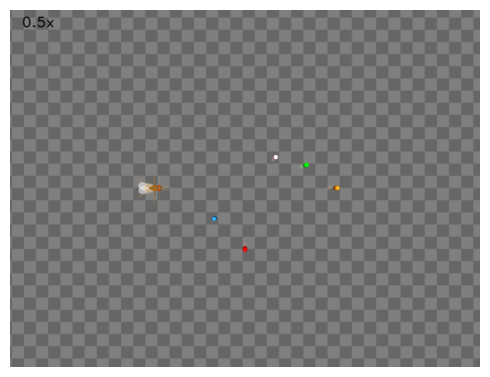

In [2]:
# Set up the arena
arena = OdorArena(
    odor_source=odor_source,
    size=(50, 50),
    peak_intensity=peak_intensity,
    odor_valence=odor_valence,
    diffuse_func=lambda x: x**-2,
    marker_size=0.3,
    marker_colors=marker_colors,
    key_angle=True,  # we add this boolean so that we compute the key for the valence dictionary by using the angle formed in the complex plane
)

# Add the NeuroMechFLy

contact_sensor_placements = [
    f"{leg}{segment}"
    for leg in ["LF", "LM", "LH", "RF", "RM", "RH"]
    for segment in ["Tibia", "Tarsus1", "Tarsus2", "Tarsus3", "Tarsus4", "Tarsus5"]
]
sim_params = Parameters(
    timestep=1e-4,
    render_mode="saved",
    render_playspeed=0.5,
    render_window_size=(800, 608),
    enable_olfaction=True,
    enable_adhesion=True,
    draw_adhesion=False,
    render_camera="birdeye_cam",
)
sim = HybridTurningNMF(
    sim_params=sim_params,
    arena=arena,
    spawn_pos=(0, 0, 0.2),
    contact_sensor_placements=contact_sensor_placements,
    simulation_time=140,
)
# odor_score_reach_addition=2,
# odor_score_time_loss=1
for i in range(1):
    sim.step(np.zeros(2))
    sim.render()
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)
ax.imshow(sim._frames[-1])
ax.axis("off")

In [17]:
sim._frames

[]

(-0.5, 799.5, 607.5, -0.5)

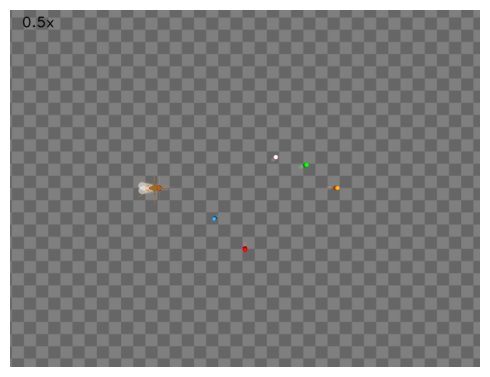

In [22]:
for i in range(10):
    sim.step(np.zeros(2))
    sim.render()
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)
ax.imshow(sim._frames[-1])
ax.axis("off")

In [23]:
name = "rdm"
path = Path(f"/home/nmf-learning/flygym-scratch/outputs/plots/{name}")
os.mkdir(path)

In [26]:
sim.save_video(
    f"/home/nmf-learning/flygym-scratch/outputs/plots/{name}/odor_taxis_video_exploration.mp4"
)

In [25]:
sim._frames

[array([[[102, 102, 102],
         [102, 102, 102],
         [107, 107, 107],
         ...,
         [127, 127, 127],
         [127, 127, 127],
         [127, 127, 127]],
 
        [[102, 102, 102],
         [102, 102, 102],
         [107, 107, 107],
         ...,
         [127, 127, 127],
         [127, 127, 127],
         [127, 127, 127]],
 
        [[102, 102, 102],
         [102, 102, 102],
         [107, 107, 107],
         ...,
         [127, 127, 127],
         [127, 127, 127],
         [127, 127, 127]],
 
        ...,
 
        [[127, 127, 127],
         [127, 127, 127],
         [121, 121, 121],
         ...,
         [102, 102, 102],
         [102, 102, 102],
         [102, 102, 102]],
 
        [[127, 127, 127],
         [127, 127, 127],
         [121, 121, 121],
         ...,
         [102, 102, 102],
         [102, 102, 102],
         [102, 102, 102]],
 
        [[127, 127, 127],
         [127, 127, 127],
         [121, 121, 121],
         ...,
         [102, 102, 102],
  